In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import load_data
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('tf')

/home/ashwin/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
Using TensorFlow backend.


# Fix Random Seed for Reproducibility

In [2]:
seed = 7
numpy.random.seed(seed)


# Normalize inputs from 0-255 to 0.0-1.0

In [3]:
def pre_process(X):
    X=X.astype('float32')
    X = X / 255.0
    return X

#  One hot encode outputs

In [4]:
def one_hot_encode(y):

    y = np_utils.to_categorical(y)
    num_classes = y.shape[1]
    return y,num_classes


# Creating and Compiling the Model

In [5]:
def define_model(num_classes,epochs):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))    
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())
    return model

In [6]:
# load data
X,y=load_data.load_datasets()

# pre process
X=pre_process(X)

#one hot encode
y,num_classes=one_hot_encode(y)


#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

epochs = 50
#define model
model=define_model(num_classes,epochs)


# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [7]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


# Summarize History for Accuracy

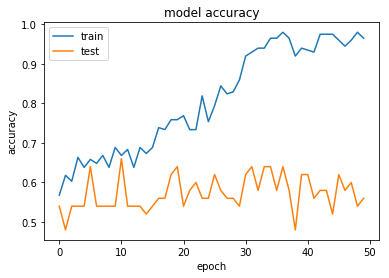

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize History for Loss

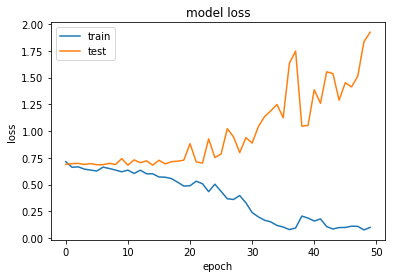

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# serialize model to JSONx
model_json = model.to_json()
with open("model_face.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_face.h5")
print("Saved model to disk")

Accuracy: 56.00%
Saved model to disk
